In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as const

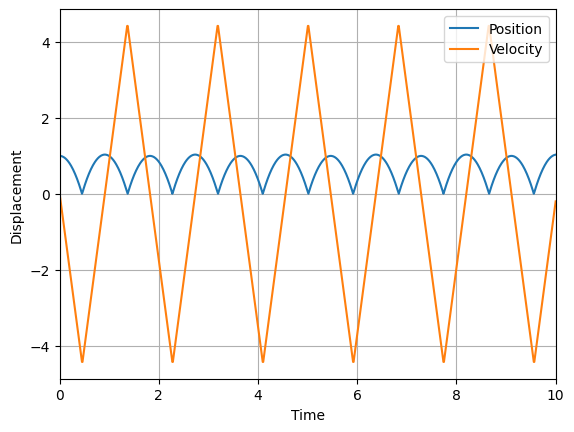

In [43]:
N = 1000
t = np.linspace(0,10,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0

def force(x):
     return -const.g * np.sign(x)

def leapfrog(x0, v0, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i])
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1])

    return x,v

x, v = leapfrog(x0, v0, dt, N)

plt.figure()
plt.plot(t, np.abs(x), label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlim(0, 10)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

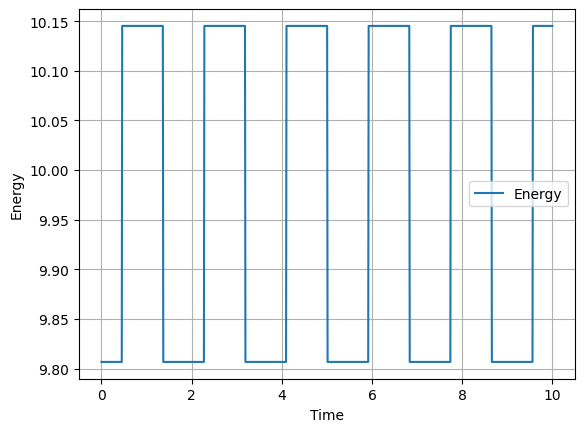

In [44]:
H = 0.5 * v **2 + const.g * np.abs(x)

plt.figure()
plt.plot(t, H, label = 'Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

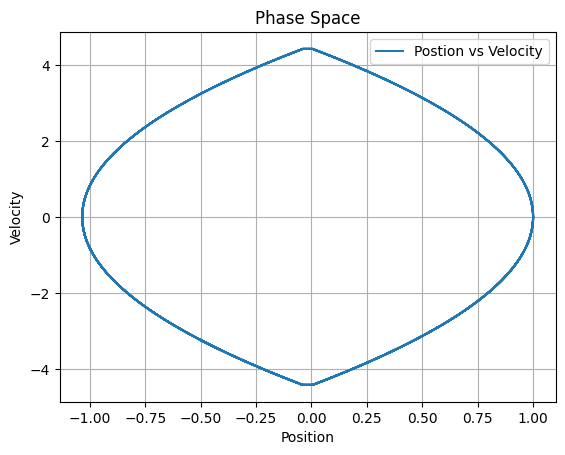

In [45]:
plt.figure()
plt.plot(x, v, label = 'Postion vs Velocity')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space')
plt.legend()
plt.grid()
plt.show()

## New Force

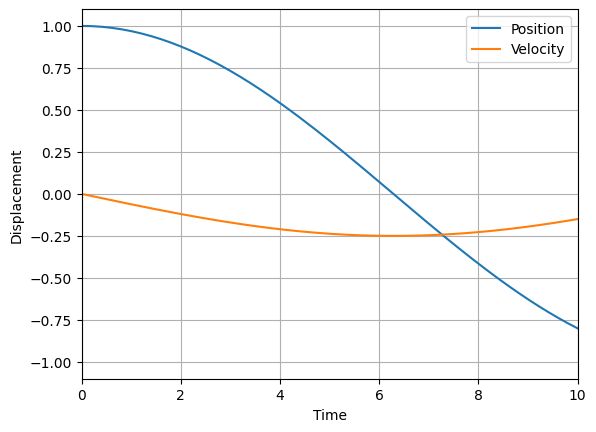

In [46]:
N = 1000
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0
x_s = 100

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

def leapfrog(x0, v0, x_s, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return x,v

x, v = leapfrog(x0, v0, x_s, dt, N)

plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlim(0, 10)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

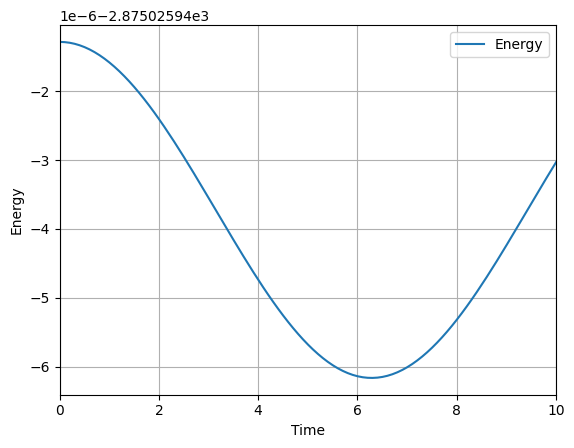

In [47]:
H = 0.5 * v**2 + -const.g/np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))

plt.figure()
plt.plot(t, H, label = 'Energy')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

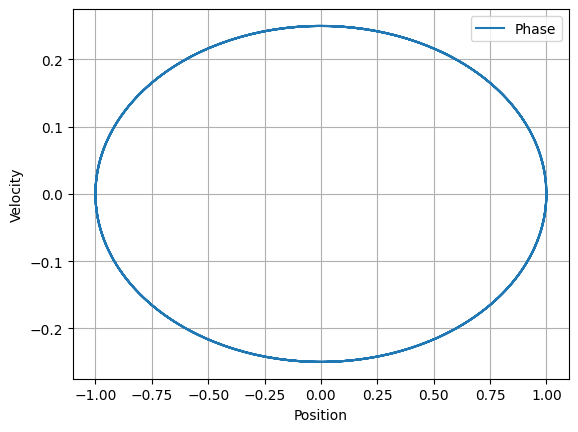

In [48]:
plt.figure()
plt.plot(x, v, label = 'Phase')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend()
plt.grid()
plt.show()

# Solutions Comparison

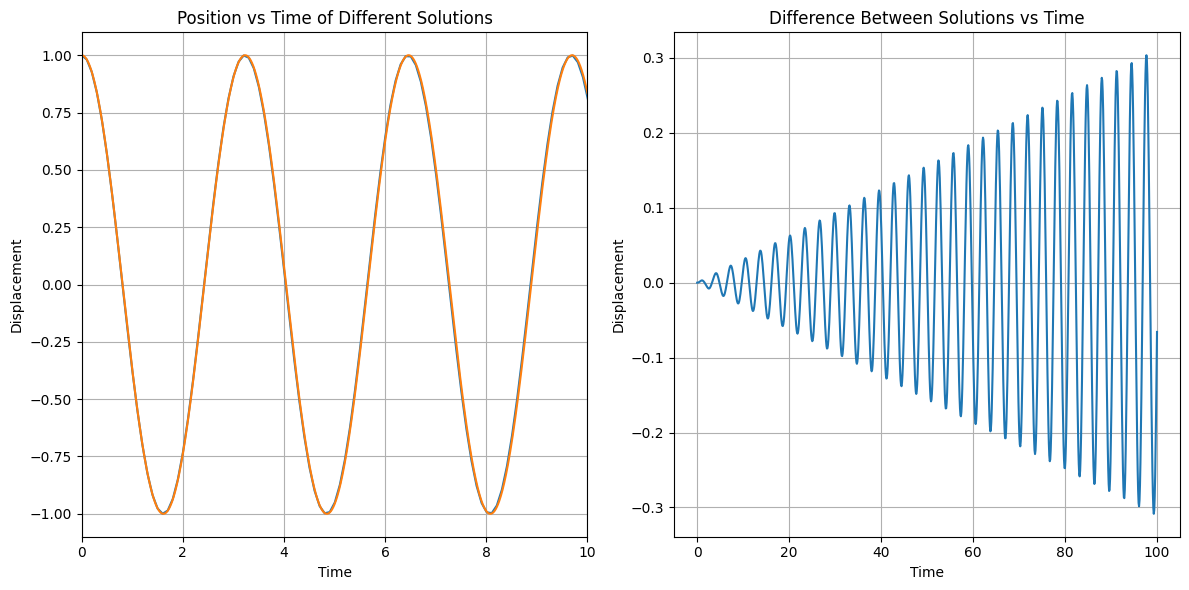

In [49]:
# Parameters
x0 = 1
v0 = 0
x_s = 1.5

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)


def numerical_solution(x0, v0, x_s):
    N = 1000
    t = np.linspace(0,100,N) 
    dt = t[1]-t[0]
    
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return t, x, v

def estimated_analytical_solution(x0, v0, x_s):
    N = 100000
    t = np.linspace(0,100,N)
    dt = t[1]-t[0]

    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return t, x ,v

t_numerical, x_numerical, v_numerical = numerical_solution(x0, v0, x_s)
t_estimate, x_estimate, v_estimate = estimated_analytical_solution(x0, v0, x_s)

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(t_numerical, x_numerical, label = 'Numerical Position')
plt.plot(t_estimate, x_estimate, label = 'Estimated Analytic Position')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Displacement')
plt.title('Position vs Time of Different Solutions')
plt.grid()

from scipy.interpolate import interp1d # Interpolates the data for the estimate as their is a dimensional difference for the time as it uses the different stepsizes.
x_estimate_interp = interp1d(t_estimate, x_estimate)(t_numerical)

plt.subplot(1,2,2)
plt.plot(t_numerical, x_estimate_interp - x_numerical)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Difference Between Solutions vs Time')
plt.grid()

plt.tight_layout()
plt.show()

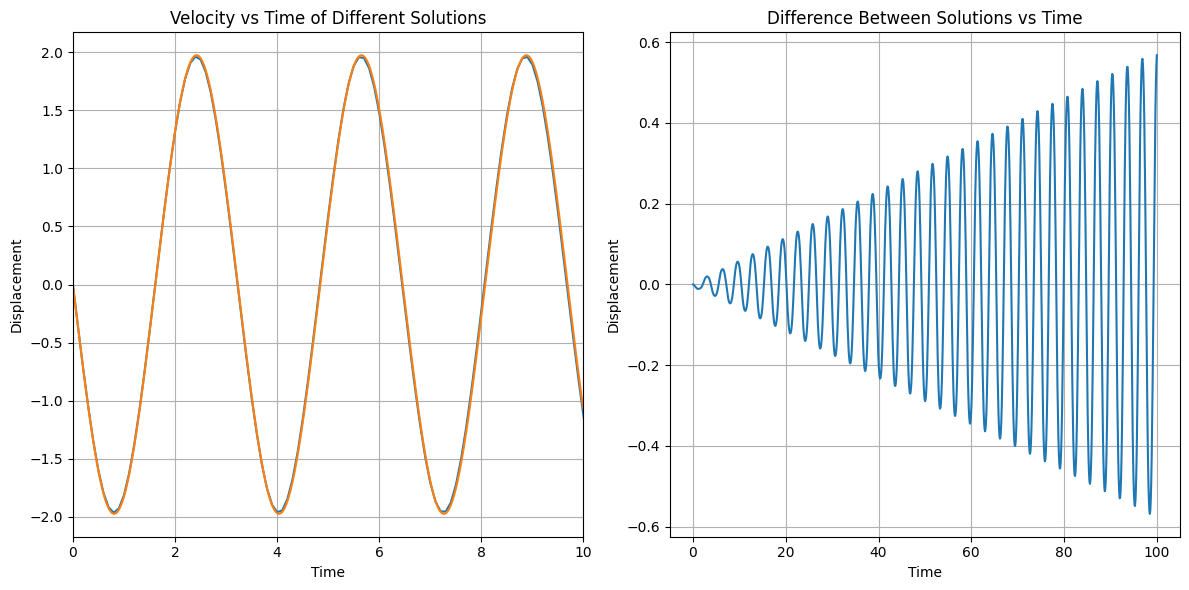

In [50]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(t_numerical, v_numerical, label = 'Numerical Velocity')
plt.plot(t_estimate, v_estimate, label = 'Estimated Analytic Velocity')
plt.xlabel('Time')
plt.xlim(0, 10)
plt.ylabel('Displacement')
plt.title('Velocity vs Time of Different Solutions')
plt.grid()

v_estimate_interp = interp1d(t_estimate, v_estimate)(t_numerical)

plt.subplot(1,2,2)
plt.plot(t_numerical, v_estimate_interp - v_numerical)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Difference Between Solutions vs Time')
plt.grid()

plt.tight_layout()
plt.show()

# Variable Step Size

0.00010000046314738041 200641
0.00012067974019987133 166260
0.00014563575932096775 137770
0.0001757510636279183 114163
0.00021209624759131076 94600
0.0002559554647449311 78390
0.00030888744574620366 64957
0.00037276531213916223 53826
0.0004498473818638269 44603
0.0005428743452444711 36960
0.0006551326626360088 30627
0.0007906096983958707 25379
0.0009541154085258646 21030
0.0011514544003380434 17426
0.0013895763505707048 14440
0.001676898698361087 11966
0.0020236099773969143 9916
0.0024420755752057456 8217
0.0029471346835914227 6809
0.0035568326406471206 5642
0.0042927028082777935 4675
0.0051805042411284296 3874
0.006252444040476911 3210
0.0075457288175593855 2660
0.009103490438244287 2205
0.010988002697639871 1827
0.013261132138724657 1514
0.016000074103580866 1255
0.019310965279971518 1040
0.023303243816365164 862
0.028140382785260036 714
0.03394939581368935 592
0.041030864879121484 490
0.04941894809332612 407
0.05971456227943574 337
0.07217299613629642 279
0.0868575451337247 232
0.10

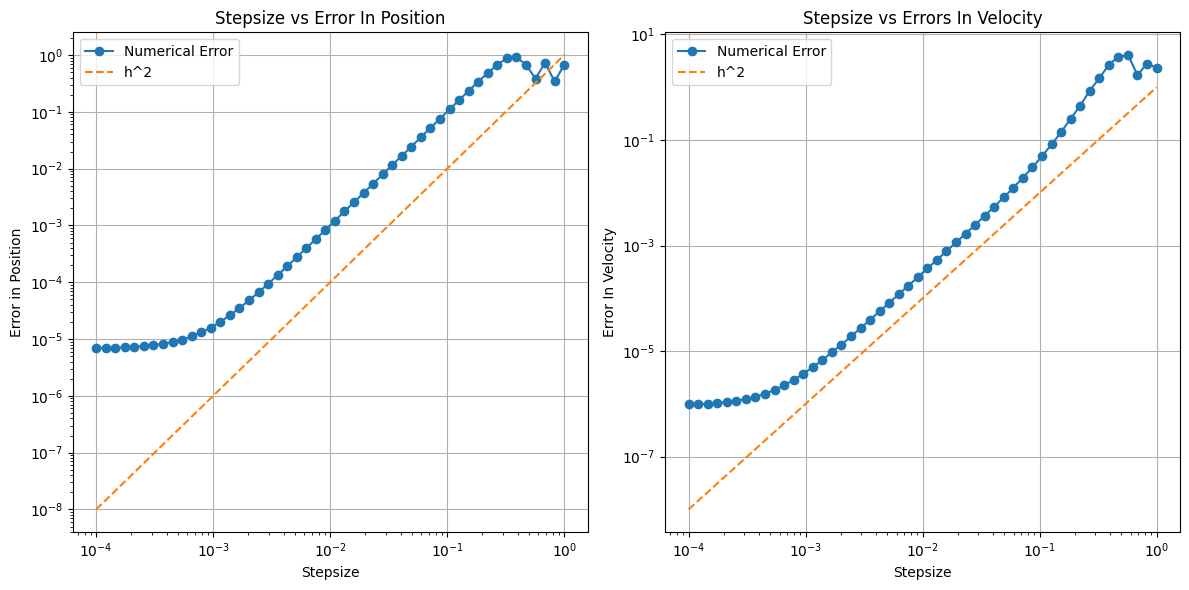

In [51]:
# Parameters
orbits = 10
x0 = 1
v0 = 0
x_s = 1
T = 2 * np.pi * np.sqrt(x0/const.g) #Time Orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    dt = t_final/(h-1)
    print(dt, h)
    
    x = np.zeros(h)
    v = np.zeros(h)

    x[0] = x0
    v[0] = v0

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return t, x, v


def estimated_analytical_solution(x0, v0, x_s, T, orbits):
    dt = 1e-5  #Reference Time Step
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    x = np.zeros(h)
    v = np.zeros(h)

    x[0] = x0
    v[0] = v0

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return t, x, v

t_estimate, x_estimate, v_estimate = estimated_analytical_solution(x0, v0, x_s, T, orbits)

def find_closest_index(t_ref, t_target):
    # Find the index in t_ref that is closest to each value in t_target.
    return np.searchsorted(t_ref, t_target)

def calculate_error(stepsizes):
    final_error_position = []
    final_error_velocity = []
    
    for dt in stepsizes:
        t_numerical, x_numerical, v_numerical = numerical_solution(x0, v0, x_s, dt, T, orbits)

        closest_indices = find_closest_index(t_estimate, t_numerical)

        x_estimate_closest = x_estimate[closest_indices]
        v_estimate_closest = v_estimate[closest_indices]
        
        error_x = np.abs(x_estimate_closest - x_numerical)[-1]
        final_error_position.append(error_x)

        error_v = np.abs(v_estimate_closest - v_numerical)[-1]
        final_error_velocity.append(error_v)

    return final_error_position, final_error_velocity, t_numerical, x_numerical, v_numerical

# Step Sizes
stepsizes = np.logspace(-4,0,50)
final_error_position, final_error_velocity, t_numerical, x_numerical, v_numerical = calculate_error(stepsizes)

#Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(stepsizes, final_error_position, marker='o', label = 'Numerical Error')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.xlabel('Stepsize')
plt.ylabel('Error in Position')
plt.title('Stepsize vs Error In Position')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(stepsizes, final_error_velocity, marker='o', label = 'Numerical Error')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.xlabel('Stepsize')
plt.ylabel('Error In Velocity')
plt.title('Stepsize vs Errors In Velocity')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

0.00010000046314738041 200641
0.00012067974019987133 166260
0.00014563575932096775 137770
0.0001757510636279183 114163
0.00021209624759131076 94600
0.0002559554647449311 78390
0.00030888744574620366 64957
0.00037276531213916223 53826
0.0004498473818638269 44603
0.0005428743452444711 36960
0.0006551326626360088 30627
0.0007906096983958707 25379
0.0009541154085258646 21030
0.0011514544003380434 17426
0.0013895763505707048 14440
0.001676898698361087 11966
0.0020236099773969143 9916
0.0024420755752057456 8217
0.0029471346835914227 6809
0.0035568326406471206 5642
0.0042927028082777935 4675
0.0051805042411284296 3874
0.006252444040476911 3210
0.0075457288175593855 2660
0.009103490438244287 2205
0.010988002697639871 1827
0.013261132138724657 1514
0.016000074103580866 1255
0.019310965279971518 1040
0.023303243816365164 862
0.028140382785260036 714
0.03394939581368935 592
0.041030864879121484 490
0.04941894809332612 407
0.05971456227943574 337
0.07217299613629642 279
0.0868575451337247 232
0.10

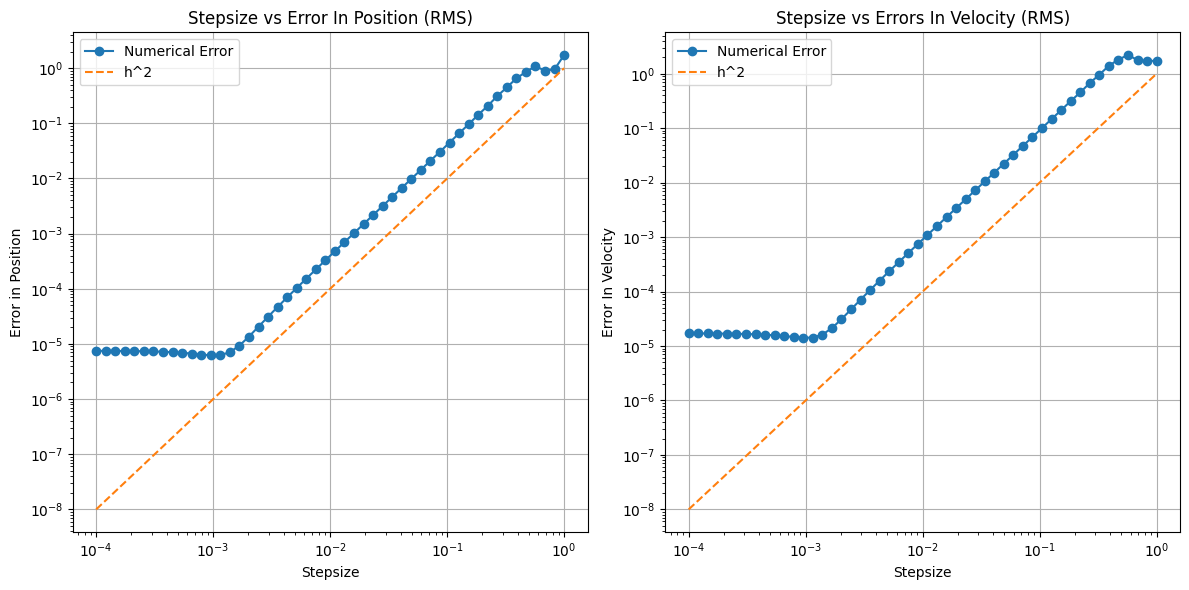

In [52]:
# Parameters
orbits = 10
x0 = 1
v0 = 0
x_s = 1
T = 2 * np.pi * np.sqrt(x0/const.g) #Time Orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    dt = t_final/(h-1)
    print(dt, h)
    
    x = np.zeros(h)
    v = np.zeros(h)

    x[0] = x0
    v[0] = v0

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return t, x, v


def estimated_analytical_solution(x0, v0, x_s, T, orbits):
    dt = 1e-5  #Reference Time Step
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    
    x = np.zeros(h)
    v = np.zeros(h)

    x[0] = x0
    v[0] = v0

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return t, x, v

t_estimate, x_estimate, v_estimate = estimated_analytical_solution(x0, v0, x_s, T, orbits)

def find_closest_index(t_ref, t_target):
    # Find the index in t_ref that is closest to each value in t_target.
    return np.searchsorted(t_ref, t_target)

def calculate_error(stepsizes):
    rms_error_position = []
    rms_error_velocity = []
    
    for dt in stepsizes:
        t_numerical, x_numerical, v_numerical = numerical_solution(x0, v0, x_s, dt, T, orbits)

        closest_indices = find_closest_index(t_estimate, t_numerical)

        x_estimate_closest = x_estimate[closest_indices]
        v_estimate_closest = v_estimate[closest_indices]
        
        error_x = np.sqrt(np.mean((x_estimate_closest - x_numerical)**2))
        rms_error_position.append(error_x)

        error_v = np.sqrt(np.mean((v_estimate_closest - v_numerical)**2))
        rms_error_velocity.append(error_v)

    return rms_error_position, rms_error_velocity, t_numerical, x_numerical, v_numerical

# Step Sizes
stepsizes = np.logspace(-4,0,50)
rms_error_position, rms_error_velocity, t_numerical, x_numerical, v_numerical = calculate_error(stepsizes)

#Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(stepsizes, rms_error_position, marker='o', label = 'Numerical Error')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.xlabel('Stepsize')
plt.ylabel('Error in Position')
plt.title('Stepsize vs Error In Position (RMS)')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(stepsizes, rms_error_velocity, marker='o', label = 'Numerical Error')
plt.plot(stepsizes, np.array(stepsizes)**2, linestyle = 'dashed', label = 'h^2')
plt.xlabel('Stepsize')
plt.ylabel('Error In Velocity')
plt.title('Stepsize vs Errors In Velocity (RMS)')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

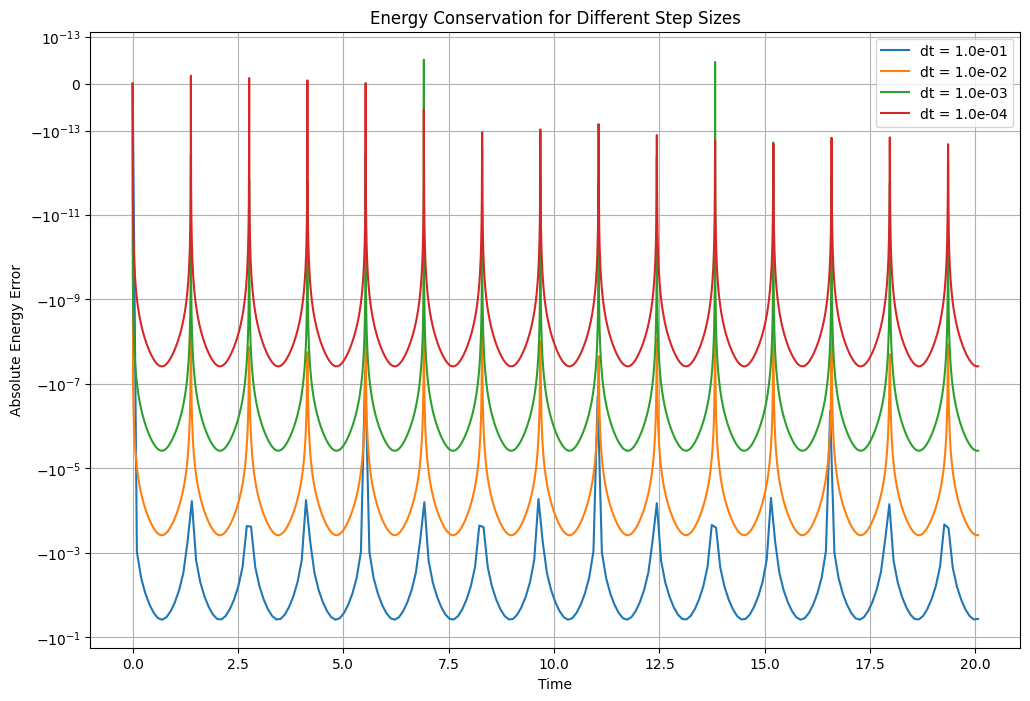

Step size: 1.0e-01
  Initial energy: 2.74e+00
  Max absolute energy error: 3.88e-02
  Mean absolute energy error: 1.58e-02

Step size: 1.0e-02
  Initial energy: 2.74e+00
  Max absolute energy error: 3.85e-04
  Mean absolute energy error: 1.57e-04

Step size: 1.0e-03
  Initial energy: 2.74e+00
  Max absolute energy error: 3.85e-06
  Mean absolute energy error: 1.57e-06

Step size: 1.0e-04
  Initial energy: 2.74e+00
  Max absolute energy error: 3.85e-08
  Mean absolute energy error: 1.57e-08



In [53]:
# Parameters
orbits = 10
x0 = 1
v0 = 0
x_s = 1
T = 2 * np.pi * np.sqrt(x0/const.g)  # Time per orbit

def force(x, x_s):
    return -const.g * 2 / np.pi * np.arctan(x / x_s)

def calculate_hamiltonian(x, v, x_s):
    kinetic = 0.5 * v**2
    potential = -const.g / np.pi * (np.log(x**2 + x_s**2) * x_s - 2 * x * np.arctan(x/x_s))
    return kinetic + potential

def numerical_solution(x0, v0, x_s, dt, T, orbits):
    t_final = orbits * T
    h = int(t_final / dt) + 1
    t = np.linspace(0, t_final, h)
    dt = t_final/(h-1)
    
    x = np.zeros(h)
    v = np.zeros(h)
    energy = np.zeros(h)

    x[0] = x0
    v[0] = v0
    energy[0] = calculate_hamiltonian(x[0], v[0], x_s)

    for i in range(h-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)
        energy[i+1] = calculate_hamiltonian(x[i+1], v[i+1], x_s)

    return t, x, v, energy

def plot_energy_conservation(stepsizes):
    plt.figure(figsize=(12, 8))
    
    for dt in stepsizes:
        t, x, v, energy = numerical_solution(x0, v0, x_s, dt, T, orbits)
        
        # Absolute Energy Error
        energy_error = energy - energy[0]
        
        plt.plot(t, energy_error, label=f'dt = {dt:.1e}')
    
    plt.xlabel('Time')
    plt.ylabel('Absolute Energy Error')
    plt.title('Energy Conservation for Different Step Sizes')
    plt.legend()
    plt.grid(True)
    plt.yscale('symlog', linthresh=1e-13)  # This allows us to see very small errors
    plt.show()

def print_energy_stats(stepsizes):
    for dt in stepsizes:
        t, x, v, energy = numerical_solution(x0, v0, x_s, dt, T, orbits)
        energy_error = energy - energy[0]
        max_error = np.max(np.abs(energy_error))
        mean_error = np.mean(np.abs(energy_error))
        print(f"Step size: {dt:.1e}")
        print(f"  Initial energy: {energy[0]:.2e}")
        print(f"  Max absolute energy error: {max_error:.2e}")
        print(f"  Mean absolute energy error: {mean_error:.2e}")
        print()

stepsizes = [1e-1, 1e-2, 1e-3, 1e-4]
plot_energy_conservation(stepsizes)
print_energy_stats(stepsizes)

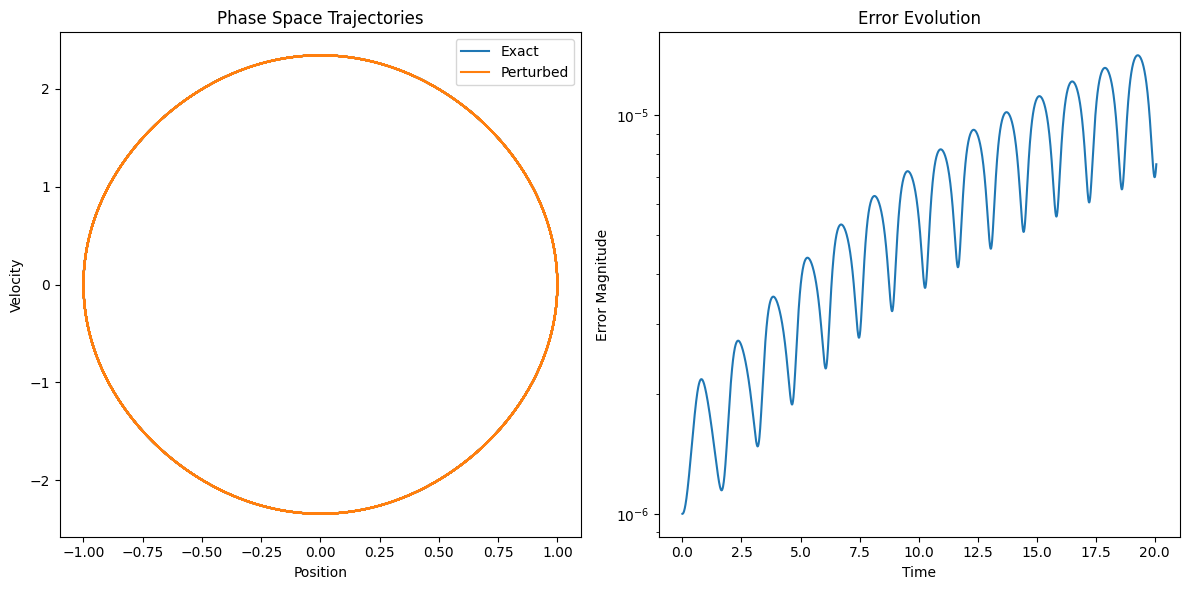

In [58]:
def phase_space_error(x0, v0, x_s, dt, orbits):
    t, x_exact, v_exact, _ = numerical_solution(x0, v0, x_s, dt, T, orbits)
    t, x_approx, v_approx, _ = numerical_solution(x0 + 1e-6, v0, x_s, dt, T, orbits)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(x_exact, v_exact, label='Exact')
    plt.plot(x_approx, v_approx, label='Perturbed')
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.title('Phase Space Trajectories')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(t, np.sqrt((x_exact - x_approx)**2 + (v_exact - v_approx)**2))
    plt.xlabel('Time')
    plt.ylabel('Error Magnitude')
    plt.title('Error Evolution')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

phase_space_error(x0, v0, x_s, 0.01, 10)

# Proper Analytic

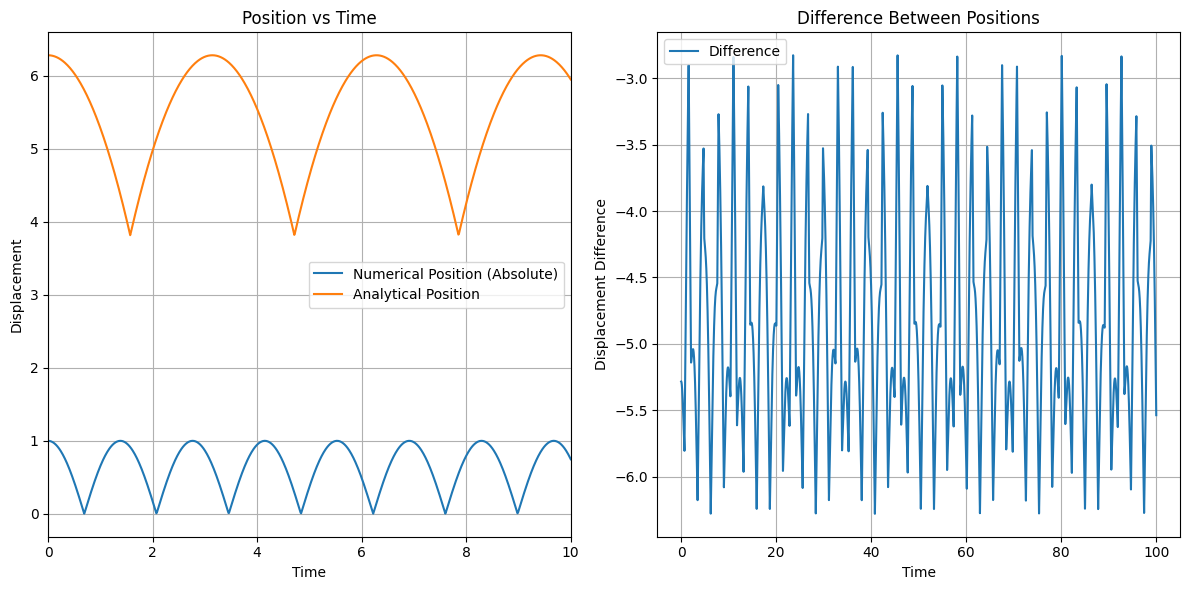

In [55]:
N = 10000
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

x0 = 1
v0 = 0
x_s = 1


def analytic(t):
    v = -(2 * np.cos(t) * np.arcsin(np.sin(t)))/(np.sqrt(1-np.sin(t)**2))
    x = (2 * np.pi - np.arcsin(np.sin(t))**2)
    # x = (x - np.min(x)) / (np.max(x) - np.min(x))  # Normalize x
    # v = (v - np.min(v)) / (np.max(v) - np.min(v))  # Normalize v
    return x,v

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

def numeric(x0, v0, x_s, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range (N-1):
       
         v[i+1] = v[i] + 0.5 * dt * force(x[i],x_s)
         x[i+1] = x[i] + dt * v[i+1]
         v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1],x_s)

    return x,v

x_numeric, v_numeric = numeric(x0, v0, x_s, dt, N)
x_analytic, v_analytic = analytic(t)

#Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, np.abs(x_numeric), label='Numerical Position (Absolute)')
plt.plot(t, x_analytic, label='Analytical Position')
plt.xlabel('Time')
plt.xlim(0,10)
plt.ylabel('Displacement')
plt.title('Position vs Time')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, np.abs(x_numeric) - x_analytic, label='Difference')
plt.xlabel('Time')
plt.ylabel('Displacement Difference')
plt.title('Difference Between Positions')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


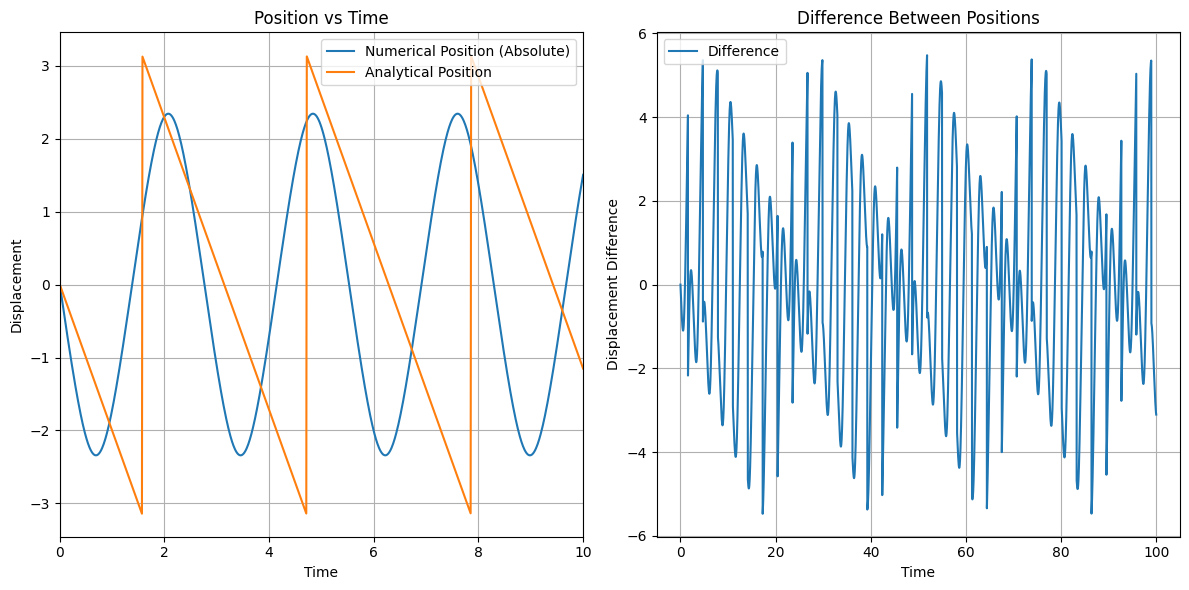

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, v_numeric, label='Numerical Position (Absolute)')
plt.plot(t, v_analytic, label='Analytical Position')
plt.xlabel('Time')
plt.xlim(0,10)
plt.ylabel('Displacement')
plt.title('Position vs Time')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, v_numeric - v_analytic, label='Difference')
plt.xlabel('Time')
plt.ylabel('Displacement Difference')
plt.title('Difference Between Positions')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Variable Step Size

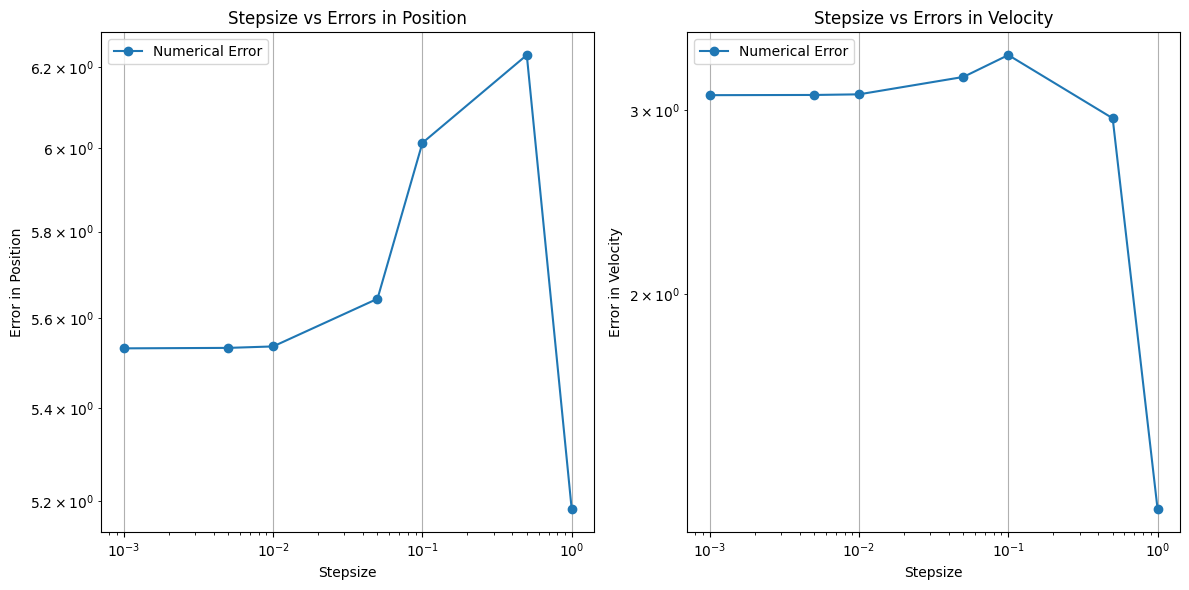

In [57]:
x0 = 1
v0 = 0
x_s = 1
t_final = 100

def analytic(t):
    v = -(2 * np.cos(t) * np.arcsin(np.sin(t)))/(np.sqrt(1-np.sin(t)**2))
    x = (2 * np.pi - np.arcsin(np.sin(t))**2)
    # x = (x - np.min(x)) / (np.max(x) - np.min(x))  # Normalize x
    # v = (v - np.min(v)) / (np.max(v) - np.min(v))  # Normalize v
    return x, v

def force(x, x_s):
    return -const.g * 2/np.pi * np.arctan(x/x_s)

def numeric(x0, v0, x_s, dt, N):
    x = np.zeros(N)
    v = np.zeros(N)

    x[0] = x0
    v[0] = v0

    for i in range(N-1):
        v[i+1] = v[i] + 0.5 * dt * force(x[i], x_s)
        x[i+1] = x[i] + dt * v[i+1]
        v[i+1] = v[i+1] + 0.5 * dt * force(x[i+1], x_s)

    return x, v

stepsizes = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
errors_position = []
errors_velocity = []

for h in stepsizes:
    N = int(t_final / h) + 1
    t = np.linspace(0, t_final, N)
    dt = t[1] - t[0]
    
    x_analytic, v_analytic = analytic(t)
    x_numeric, v_numeric = numeric(x0, v0, x_s, dt, N)

    error_x = np.abs(x_numeric - x_analytic)[-1]
    error_v = np.abs(v_numeric - v_analytic)[-1]
    errors_position.append(error_x)
    errors_velocity.append(error_v)

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(stepsizes, errors_position, label = 'Numerical Error', marker = 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Position')
plt.title('Stepsize vs Errors in Position')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(stepsizes, errors_velocity, label = 'Numerical Error', marker = 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Stepsize")
plt.ylabel('Error in Velocity')
plt.title('Stepsize vs Errors in Velocity')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()